In [23]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk streamlit gitpython


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st
import git
import re 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


print("All libraries are installed successfully.")

All libraries are installed successfully.


In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |

True

In [3]:
df= pd.read_csv("UpdatedResumeDataSet.csv")

In [4]:
print(df.head())

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [6]:
print(df.isnull().sum())

Category    0
Resume      0
dtype: int64


In [7]:
print(df.describe())

              Category                                             Resume
count              962                                                962
unique              25                                                166
top     Java Developer  Technical Skills Web Technologies: Angular JS,...
freq                84                                                 18


In [8]:
print(df.duplicated().sum())

796


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print(df['Category'].value_counts())

Category
Java Developer               13
Database                     11
Data Science                 10
Advocate                     10
HR                           10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
Web Designing                 4
PMO                           3
Name: count, dtype: int64


In [11]:
print(df.columns)

Index(['Category', 'Resume'], dtype='object')


In [12]:
if 'Resume_html' in df.columns:
    df.drop(columns=['Resume_html'], inplace=True)

In [13]:
stop_words= set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W',' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words= word_tokenize(text)
    words= [word for word in words if word  not in stop_words]
    words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['Cleaned_Resume'] = df['Resume'].apply(preprocess_text)
print("Text Preprocessing Completed")
    

Text Preprocessing Completed


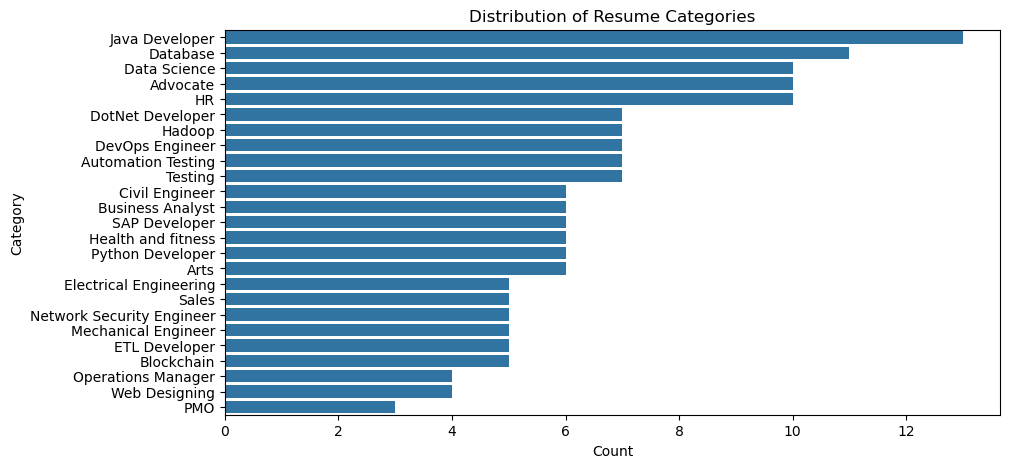

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index)
plt.title("Distribution of Resume Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [15]:
label_encoder = LabelEncoder()
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])
print(df[['Category', 'Category_Encoded']].head())
print("Category Encoding Completed")

       Category  Category_Encoded
0  Data Science                 6
1  Data Science                 6
2  Data Science                 6
3  Data Science                 6
4  Data Science                 6
Category Encoding Completed


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Resume'], df['Category_Encoded'], test_size=0.2, random_state=42)
print("Data split into Training and Testing Sets")

Data split into Training and Testing Sets


In [17]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("TF-IDF Vectorization Completed")

TF-IDF Vectorization Completed


In [18]:
models={
    "Naive Bayes": MultinomialNB(),
    "SVC": SVC(),
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "Bagging" : BaggingClassifier(),
    "Extra Trees" : ExtraTreesClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier()
}

best_model = None
best_accuracy= 0

for name, model in models.items():
    try:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf )
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
    except Exception as e:
        print(f"Error training {name}:{e}")

print(f"Best Model : {best_model}")
    


Naive Bayes Accuracy: 0.2059
SVC Accuracy: 0.3529
Logistic Regression Accuracy: 0.3824
Decision Tree Accuracy: 0.7353
K-Nearest Neighbors Accuracy: 0.7647
Random Forest Accuracy: 0.6471


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.4118
Bagging Accuracy: 0.7941
Extra Trees Accuracy: 0.6765
Gradient Boosting Accuracy: 0.7647
Best Model : BaggingClassifier()


In [19]:
print("Hyperparameter Tuning")
try:
    rf_params = {
        'n_estimators': [50,100],
        'max_depth':[10,20,None]
    }
    grid_rf = GridSearchCV(RandomFOrestClassifier(), rf_params, cv=3, n_jobs=-1)
    grid_rf.fit(X_train_tfidf, y_train)
    print("Best Random Forest Parameters:", grid_rf.best_params_)
except Exception as e:
    print("Random FOrest Tuning Error:",e)

try:
    svc_params = {
        'c': [0.1,1,10],
        'kernel':['linear','rbf']
    }
    grid_svc = GridSearchCV(SVC(), svc_params, cv=3, n_jobs=-1)
    grid_svc.fit(X_train_tfidf, y_train)
    print("Best SVC Parameters:", grid_svc.best_params_)
except Exception as e:
    print("SVC TUning Error:", e)
    
    

Hyperparameter Tuning
Random FOrest Tuning Error: name 'RandomFOrestClassifier' is not defined


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


SVC TUning Error: Invalid parameter 'c' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].


In [20]:
y_pred = best_model.predict(X_test_tfidf)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Model Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")

Model Accuracy: 0.7941176470588235

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.33      0.50      0.40         2
           2       0.00      0.00      0.00         0
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         3
          14       0.50      0.50      0.50         2
          15       0.50      1.00      0.67         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       0.00      0.00      0.00         2
          20       1.0

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_

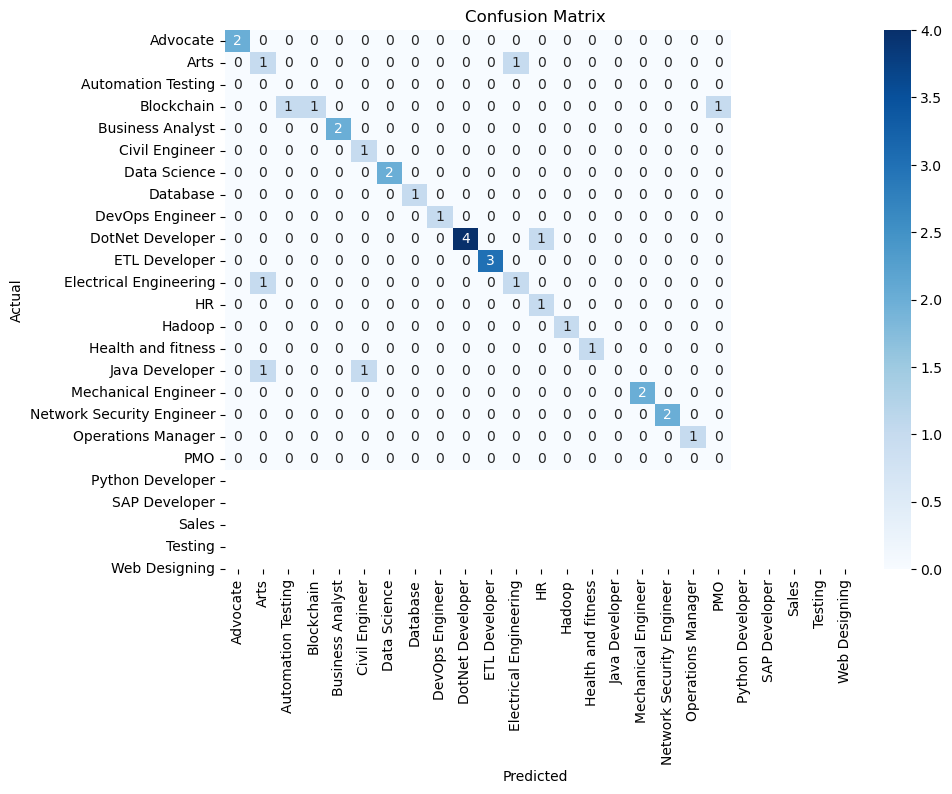

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
import joblib

joblib.dump(best_model, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model, Vectorizer, and Label Encoder saved successfully.")

Model, Vectorizer, and Label Encoder saved successfully.
